In [1]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 200)

In [3]:
tweets = pd.read_pickle('cleaned_tweets_v1.pkl')
tweets.head()

,label,tweet,cleaned_tweets,cleaned_tweets_without_stopwords
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this would you talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk about question have unless pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [5]:
tweets.shape

(7920, 4)

In [7]:
positive_tweets = tweets[tweets.label==1]
positive_tweets.head()

,label,tweet,cleaned_tweets,cleaned_tweets_without_stopwords
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this would you talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
6,1,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/,happy for instapic instadaily sony xperia xperiaz,happy instapic instadaily sony xperia xperiaz


In [17]:
neg_tweets = tweets[tweets.label==0]
neg_tweets.head()

,label,tweet,cleaned_tweets,cleaned_tweets_without_stopwords
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk about question have unless pay them for their stupid support,amazing service apple talk question unless pay stupid support
5,0,iPhone software update fucked up my phone big time Stupid iPhones,iphone software update fucked phone big time stupid iphones,iphone software update fucked phone big time stupid iphones
10,0,hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.,hey apple when you make new ipod not make new color inch thinner make not crash every five fuckin minite,hey apple make new ipod make new color inch thinner make crash fuckin minite
11,0,Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade,not heavy machinery but doe what need really dropped the ball with that design drinkyourhaterade,heavy machinery need really dropped ball design drinkyourhaterade
12,0,Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo,contemplating giving the iphone bandwagon simply because cellcom ha new android depressing idontwantto,contemplating giving iphone bandwagon simply cellcom new android depressing idontwantto


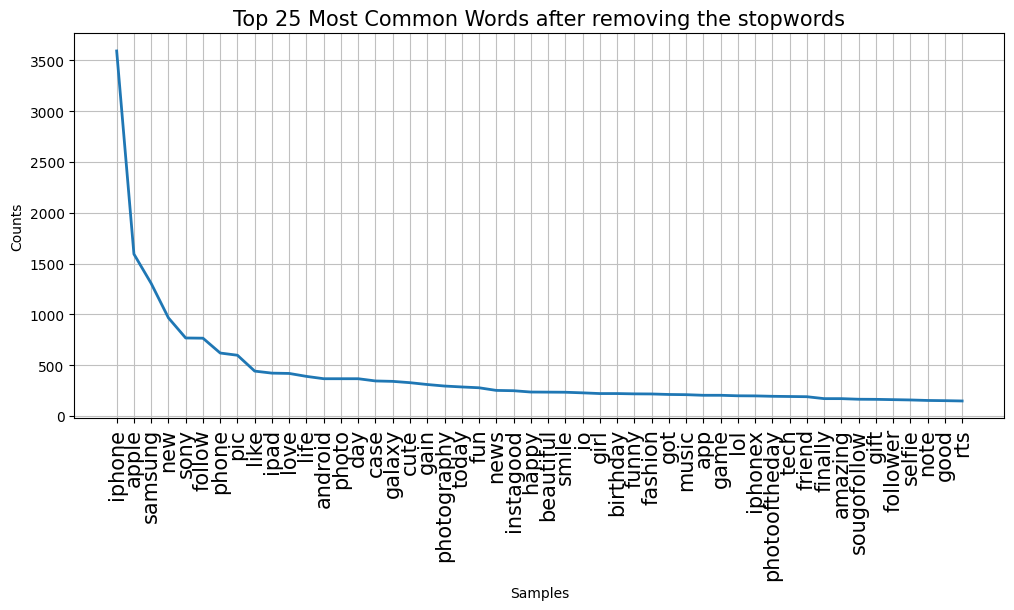

In [11]:
positive_vocab = [token for tweet in positive_tweets.cleaned_tweets_without_stopwords for token in tweet.split()]
positive_freq = nltk.FreqDist(positive_vocab)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
positive_freq.plot(50, cumulative=False)
plt.show()

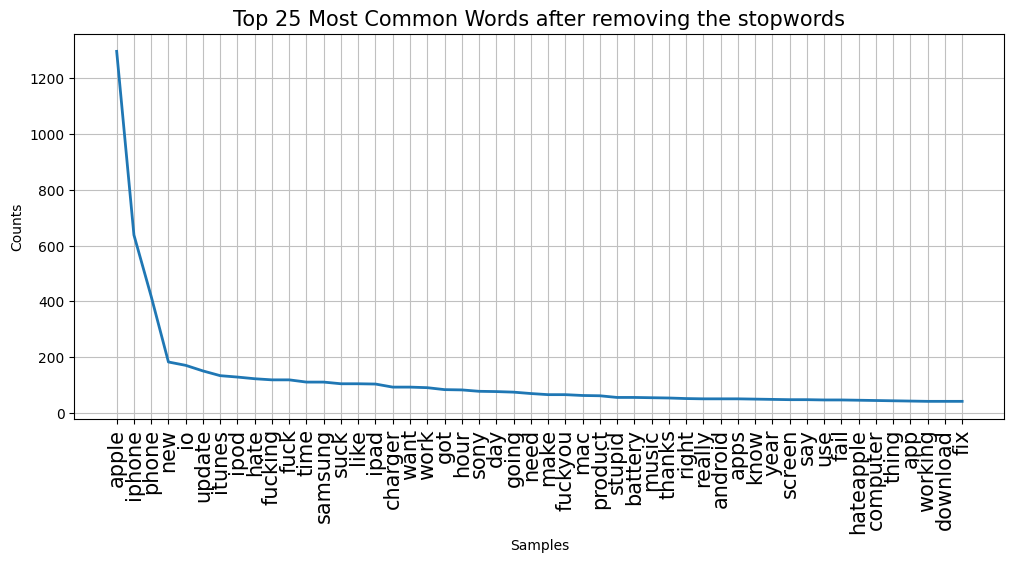

In [21]:
neg_vocab = [token for tweet in neg_tweets.cleaned_tweets_without_stopwords for token in tweet.split()]
neg_freq = nltk.FreqDist(neg_vocab)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
neg_freq.plot(50, cumulative=False)
plt.show()

In [13]:
positive_freq

FreqDist({'iphone': 3593, 'apple': 1594, 'samsung': 1305, 'new': 966, 'sony': 768, 'follow': 766, 'phone': 620, 'pic': 598, 'like': 442, 'ipad': 422, ...})

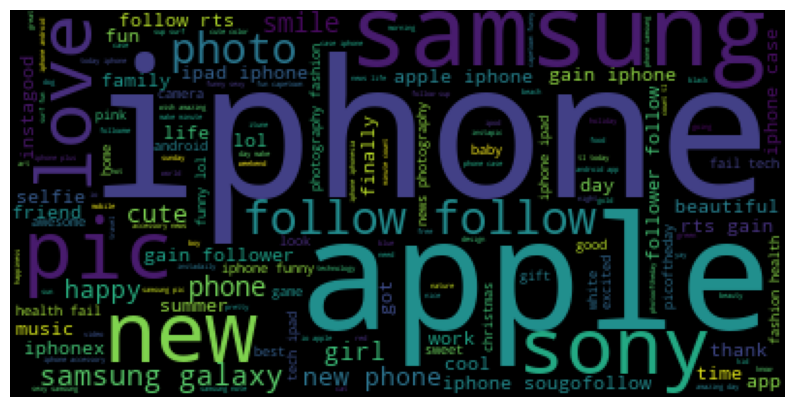

In [15]:
p_vocab = ' '.join(map(str, positive_vocab))
pos_wordcloud = WordCloud()
pos_wordcloud.generate(p_vocab)
plt.figure(figsize=(10,8))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()

In [25]:
neg_vocab

['amazing',
 'service',
 'apple',
 'talk',
 'question',
 'unless',
 'pay',
 'stupid',
 'support',
 'iphone',
 'software',
 'update',
 'fucked',
 'phone',
 'big',
 'time',
 'stupid',
 'iphones',
 'hey',
 'apple',
 'make',
 'new',
 'ipod',
 'make',
 'new',
 'color',
 'inch',
 'thinner',
 'make',
 'crash',
 'fuckin',
 'minite',
 'heavy',
 'machinery',
 'need',
 'really',
 'dropped',
 'ball',
 'design',
 'drinkyourhaterade',
 'contemplating',
 'giving',
 'iphone',
 'bandwagon',
 'simply',
 'cellcom',
 'new',
 'android',
 'depressing',
 'idontwantto',
 'louise',
 'battery',
 'painful',
 'charge',
 'overnight',
 'lunchtime',
 'battery',
 'dead',
 'hateorange',
 'reason',
 'iphone',
 'suck',
 'apple',
 'truth',
 'truthbetold',
 'agree',
 'fact',
 'realitycheck',
 'blackberrypic',
 'zpggd',
 'cazn',
 'apple',
 'store',
 'gunna',
 'screen',
 'monday',
 'fucking',
 'apple',
 'store',
 'fuckingpissed',
 'new',
 'ipod',
 'day',
 'button',
 'broke',
 'accidentally',
 'hit',
 'iphone',
 'screen',
 '

# Feature Extraction - Bag of Words Model

In [ ]:
# bow, tf-idf, ngram - basic language model
# word2vec, glove, fasttext - distributed language model 
# transformers, bert, gpt - large language model (context model)

In [28]:
tweets.head()

,label,tweet,cleaned_tweets,cleaned_tweets_without_stopwords
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this would you talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk about question have unless pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [ ]:
# i like food
# i don't like food
# stop words
# i likd food

In [62]:
x = tweets['cleaned_tweets']
y = tweets['label']

In [64]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_train = cv.fit_transform(x_train)
cv_test = cv.transform(x_test)

In [68]:
cv_train

<6336x13481 sparse matrix of type '<class 'numpy.int64'>'
	with 80380 stored elements in Compressed Sparse Row format>

In [70]:
cv_train[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
cv.get_feature_names_out()

array(['aag', 'aah', 'aalborg', ..., 'zyrithxkuv', 'zzita', 'zzjvgtyaxl'],
      dtype=object)

In [74]:
df = pd.DataFrame(cv_train.todense(), columns=cv.get_feature_names_out())
df.head(20)

,aag,aah,aalborg,aapl,aarhus,aaron,aarp,aarrrggghhhh,aashamsakal,aayp,...,zunehd,zunjndm,zurich,zwckahsl,zwcn,zxw,zxzh,zyrithxkuv,zzita,zzjvgtyaxl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df.shape

(6336, 13481)

# Actual Machine Learning Model - Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(cv_train, y_train)

LogisticRegression()

In [81]:
LR.predict(cv_train)[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [83]:
LR.score(cv_train, y_train)

0.9775883838383839

In [85]:
LR.score(cv_test, y_test)

0.8718434343434344

# TF-IDF Logistic Model

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer()
TFIDF_train = TFIDF.fit_transform(x_train)
TFIDF_test = TFIDF.transform(x_test)

In [90]:
LR.fit(TFIDF_train, y_train)

LogisticRegression()

In [92]:
LR.score(TFIDF_train, y_train)

0.9199810606060606

In [94]:
LR.score(TFIDF_test, y_test)

0.8718434343434344

# Model Building taking account of the class imbalance - regularization method

In [97]:
LR = LogisticRegression(class_weight='balanced', penalty='l2')
LR.fit(TFIDF_train, y_train)

print("Train Score:", LR.score(TFIDF_train, y_train))
print()
print("Test Score:", LR.score(TFIDF_test, y_test))

Train Score: 0.9266098484848485

Test Score: 0.8737373737373737


In [99]:
LR = LogisticRegression(class_weight='balanced', penalty='l2', C=2)
LR.fit(TFIDF_train, y_train)

print("Train Score:", LR.score(TFIDF_train, y_train))
print()
print("Test Score:", LR.score(TFIDF_test, y_test))

Train Score: 0.943655303030303

Test Score: 0.8794191919191919


In [107]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1', C=2)
LR.fit(TFIDF_train, y_train)

print("Train Score:", LR.score(TFIDF_train, y_train))
print()
print("Test Score:", LR.score(TFIDF_test, y_test))

Train Score: 0.9244002525252525

Test Score: 0.8787878787878788
